### Cost of Living - EDA

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Load dataset from an csv file

cost = pd.read_csv('cost_clean.csv')
cost

city      country continent  restaurant  groceries  \
0                  Delhi        India      Asia        4.90      36.63   
1               Shanghai        China      Asia        7.72      71.51   
2                Jakarta    Indonesia      Asia        4.57      62.00   
3                 Manila  Philippines      Asia        5.25      46.84   
4                  Seoul  South Korea      Asia        9.95     127.80   
...                  ...          ...       ...         ...        ...   
4644        Port Douglas    Australia   Oceania       13.80     100.61   
4645         Rockhampton    Australia   Oceania       12.64      68.43   
4646        Egilsstadhir      Iceland    Europe       13.91      91.46   
4647  Ixtapa Zihuatanejo       Mexico   America        7.59       4.63   
4648             Iqaluit       Canada   America       18.14      98.29   

      transport  freetime  utilities  childcare  clothing     rent  \
0         11.63     12.98      65.33      73.76     37.75   319.81   
1         27.94     35.80      81.50    1356.63     77.79  1537.29   
2          9.53     17.02     110.57     132.74     54.51   613.76   
3         11.86     26.79     135.47     254.89     49.18   820.13   
4         41.47     32.13     198.30     384.01     70.25  1424.56   
...         ...       ...        ...        ...       ...      ...   
4644      78.01     13.41     179.06    1341.25     57.49  1379.86   
4645      90.53     28.50     147.37    1421.63     68.12   797.78   
4646      52.96     30.90     185.94     176.53    115.51  1068.00   
4647      19.72     16.86     105.46     191.87     62.26   402.14   
4648      66.04     41.01     344.96     778.75     67.13  2978.11   

      housing_price  average_salary  
0           1844.18          586.35  
1          13253.98         1382.83  
2           1981.74          483.19  
3           3066.24          419.02  
4          16340.42         2672.23  
...             ...             ...  
4644        4196.00         5867.96  
4645        4498.33         3435.18  
4646        1888.86         2471.40  
4647         943.56          635.37  
4648        4616.19         2970.08  

[4649 rows x 13 columns]

In [3]:
cost.describe()

restaurant    groceries    transport     freetime    utilities  \
count  4649.000000  4649.000000  4649.000000  4649.000000  4649.000000   
mean      9.078240    58.355208    43.478167    19.541914   167.509578   
std       5.235973    26.788816    31.770115    12.250118    98.726669   
min       0.840000     0.660000     0.000000     0.810000     2.440000   
25%       4.830000    38.290000    20.000000    10.720000    84.780000   
50%       8.430000    54.670000    37.750000    18.120000   161.670000   
75%      12.620000    75.790000    62.250000    25.060000   230.640000   
max      80.000000   216.790000   364.580000   131.720000  1401.950000   

         childcare     clothing          rent  housing_price  average_salary  
count  4649.000000  4649.000000   4649.000000    4649.000000     4649.000000  
mean    538.065500    62.235578    878.991138    2757.413827     1909.987533  
std     514.255873    23.619118    760.564283    2792.979677     1622.178597  
min       4.070000     8.030000     19.660000      84.140000       18.000000  
25%     155.800000    48.120000    316.770000    1096.620000      473.780000  
50%     332.380000    61.780000    668.660000    2243.930000     1447.110000  
75%     888.780000    73.680000   1274.940000    3288.420000     3063.000000  
max    4250.000000   431.310000  16106.670000   60275.990000    12681.260000

<Axes: >

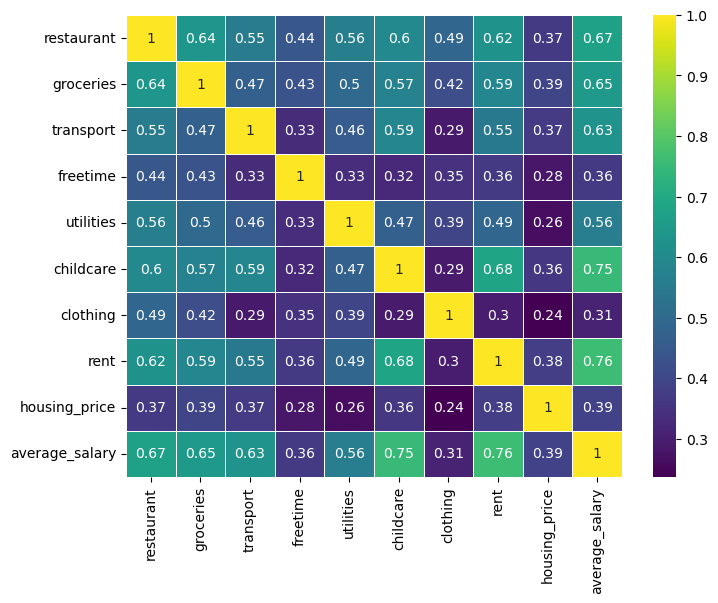

In [4]:
# correlation between different cost of living factors

selected_columns = ['restaurant', 'groceries', 'transport', 'freetime', 'utilities', 'childcare', 'clothing', 'rent', 'housing_price', 'average_salary']  
corr_matrix = cost[selected_columns].corr()
plt.figure(figsize=(8, 6)) 
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)

In [5]:
# The number of cities in each continent

cost['continent'].value_counts()

Europe     1667
America    1643
Asia        968
Africa      283
Oceania      88
Name: continent, dtype: int64

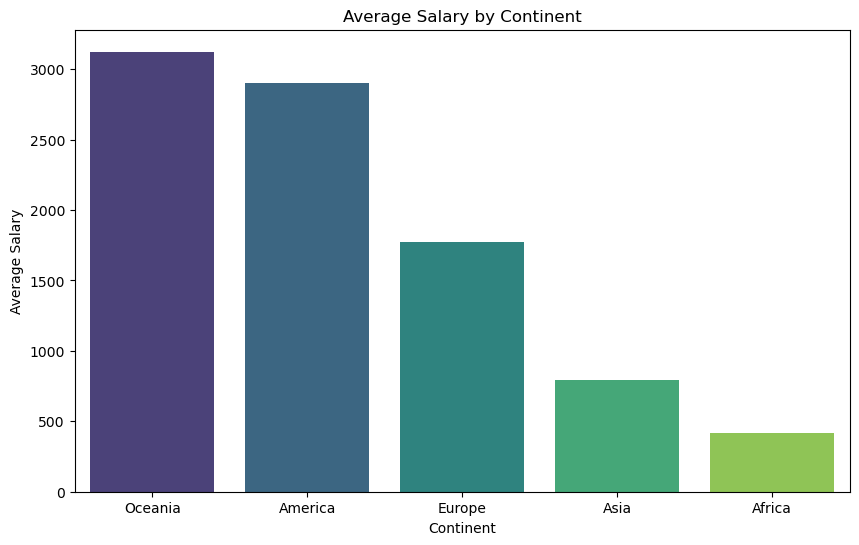

In [6]:
# Bar plot average salary by continent

avg = cost.groupby('continent')['average_salary'].mean().reset_index().sort_values(by='average_salary', ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='average_salary', data=avg, palette='viridis')
plt.xlabel('Continent')
plt.ylabel('Average Salary')
plt.title('Average Salary by Continent')
plt.show()


In [7]:
# The number of cities in each country

cost['country'].value_counts().head(50)

United States     1046
Italy              173
India              162
United Kingdom     161
Brazil             157
Germany            145
Russia             126
Canada             117
France             109
China              102
Spain               86
Mexico              84
Philippines         77
Japan               74
Poland              65
Turkey              61
Australia           56
Netherlands         53
Romania             52
Portugal            51
Ukraine             42
Hungary             42
Switzerland         41
Belgium             39
Indonesia           39
Thailand            38
Pakistan            38
Iran                37
Greece              35
South Africa        34
Malta               34
Slovakia            34
Israel              34
Serbia              34
Algeria             33
Morocco             32
Sweden              30
Bulgaria            30
Nigeria             30
South Korea         29
Finland             27
Slovenia            27
Malaysia            26
Colombia   

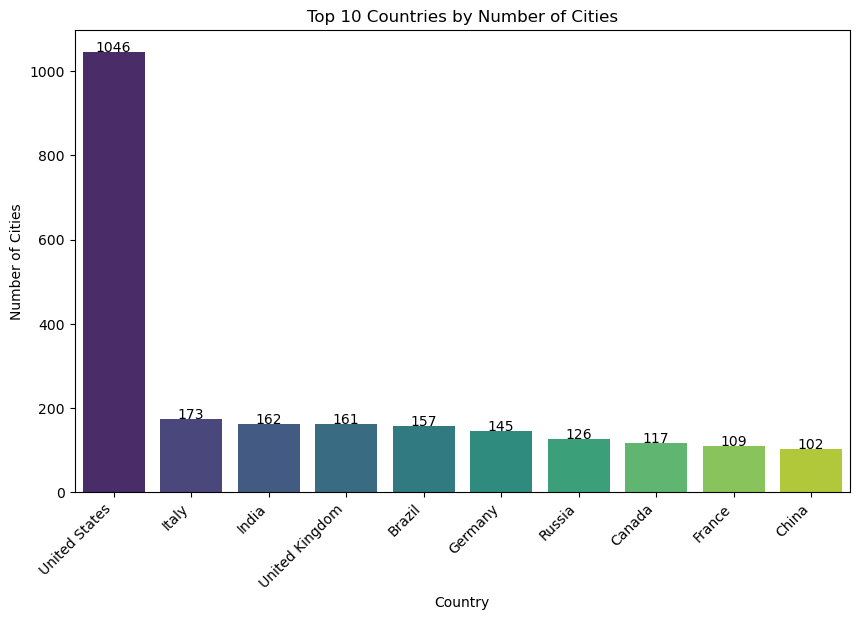

In [8]:
# The number of cities in each country: 10 fisrt

top_countries = cost['country'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')

for i, v in enumerate(top_countries.values):
    ax.text(i, v + 0.3, str(v), color='black', ha='center', fontweight='normal')

plt.xlabel('Country')
plt.ylabel('Number of Cities')
plt.title('Top 10 Countries by Number of Cities')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

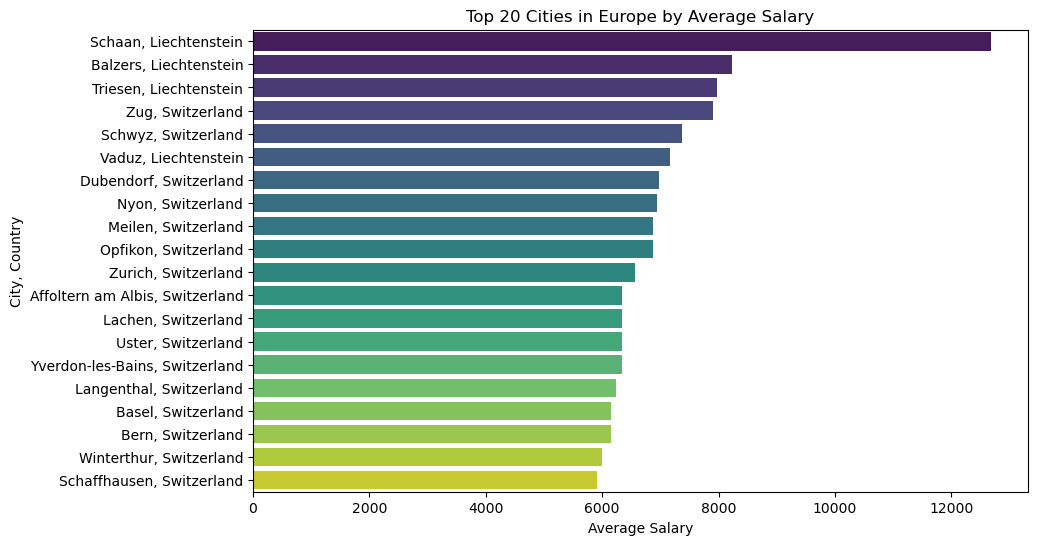

In [9]:
# The 20 cities of cities in EUROPE

top_cities_europe = cost[cost['continent'] == 'Europe'].groupby(['city', 'country'])['average_salary'].mean().nlargest(20)
city_labels = [f"{city}, {country}" for (city, country) in top_cities_europe.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities_europe.values, y=city_labels, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('City, Country')
plt.title('Top 20 Cities in Europe by Average Salary')
plt.show()

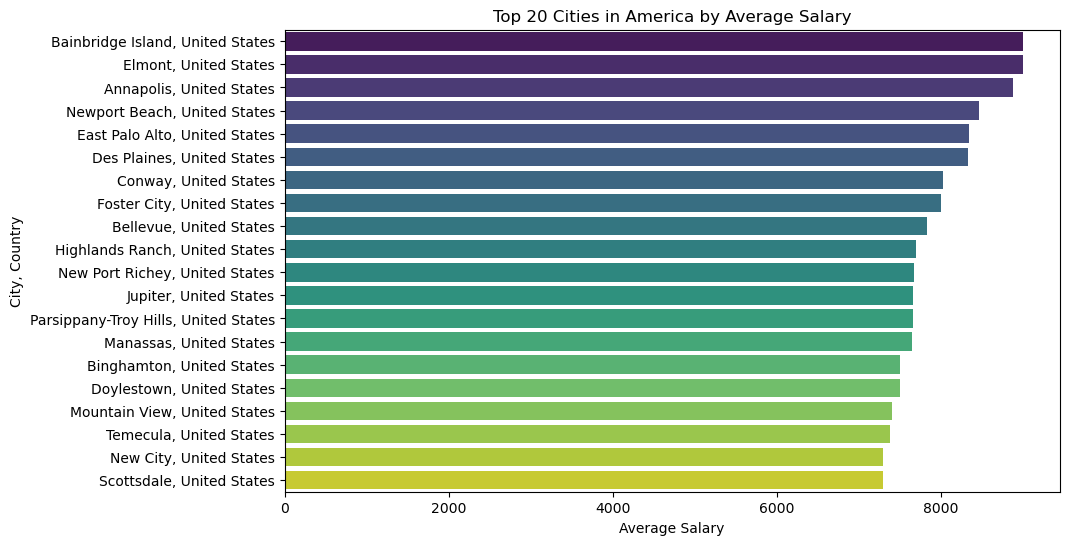

In [10]:
# The 20 cities of cities in AMERICA

top_cities_america = cost[cost['continent'] == 'America'].groupby(['city', 'country'])['average_salary'].mean().nlargest(20)
city_labels = [f"{city}, {country}" for (city, country) in top_cities_america.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities_america.values, y=city_labels, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('City, Country')
plt.title('Top 20 Cities in America by Average Salary')
plt.show()

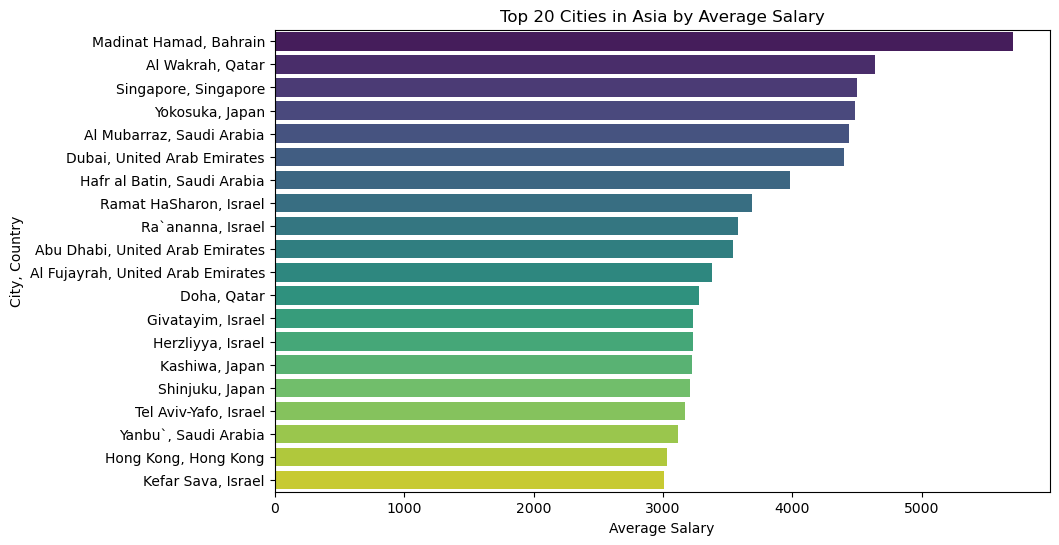

In [11]:
# The 20 cities of cities in ASIA

top_cities_asia = cost[cost['continent'] == 'Asia'].groupby(['city', 'country'])['average_salary'].mean().nlargest(20)
city_labels = [f"{city}, {country}" for (city, country) in top_cities_asia.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities_asia.values, y=city_labels, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('City, Country')
plt.title('Top 20 Cities in Asia by Average Salary')
plt.show()

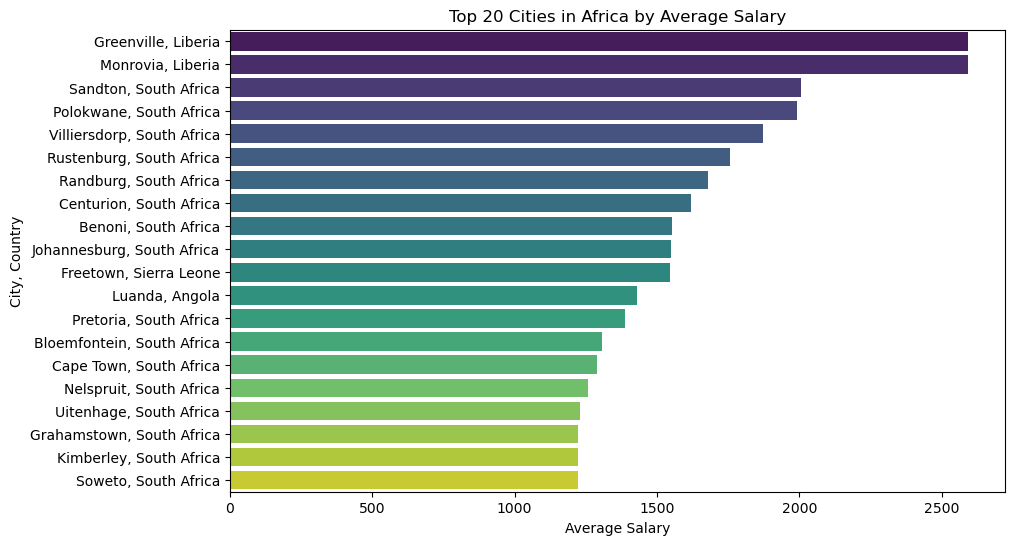

In [12]:
# The 20 cities of cities in AFRICA

top_cities_africa = cost[cost['continent'] == 'Africa'].groupby(['city', 'country'])['average_salary'].mean().nlargest(20)
city_labels = [f"{city}, {country}" for (city, country) in top_cities_africa.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities_africa.values, y=city_labels, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('City, Country')
plt.title('Top 20 Cities in Africa by Average Salary')
plt.show()

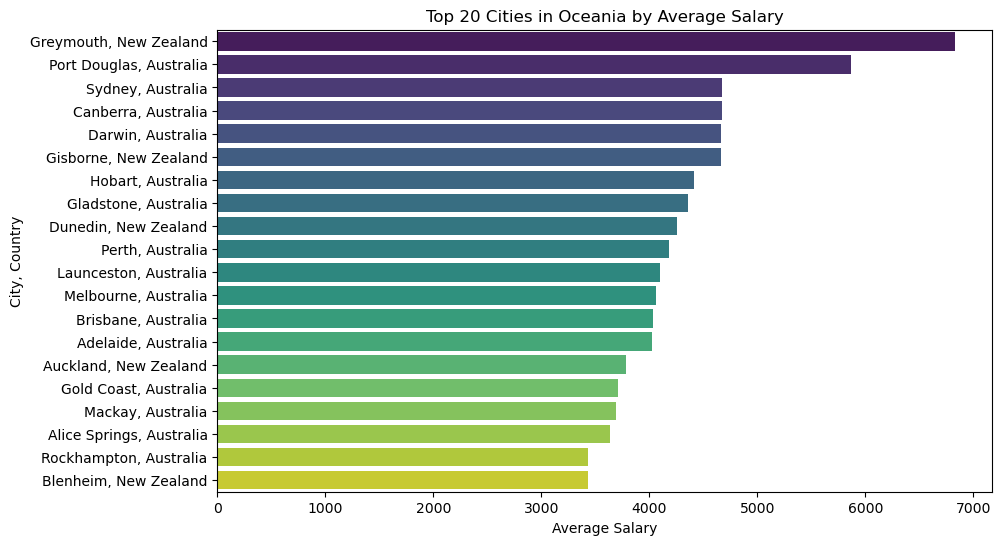

In [13]:
# The 20 cities of cities in OCEANIA

top_cities_oceania = cost[cost['continent'] == 'Oceania'].groupby(['city', 'country'])['average_salary'].mean().nlargest(20)
city_labels = [f"{city}, {country}" for (city, country) in top_cities_oceania.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities_oceania.values, y=city_labels, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('City, Country')
plt.title('Top 20 Cities in Oceania by Average Salary')
plt.show()

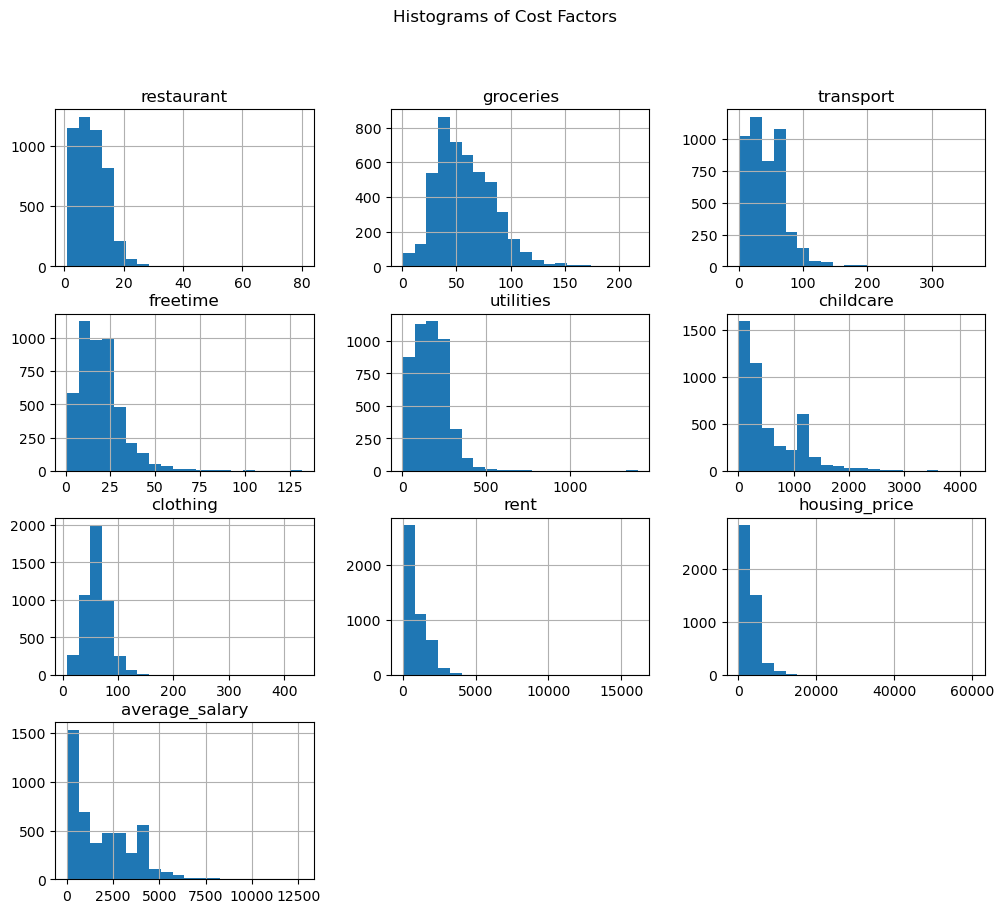

In [14]:
# Histogram: distribution of individual cost components

cost.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Cost Factors', y=0.98)
plt.show()

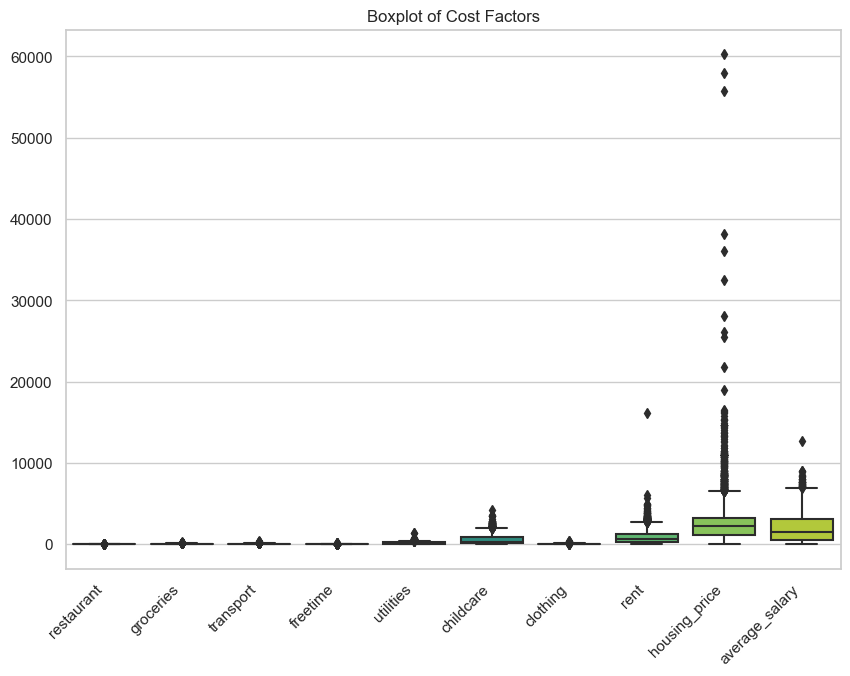

In [15]:
# distribution of each cost factor

sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))
ax = sns.boxplot(data=cost, palette='viridis')
plt.title('Boxplot of Cost Factors')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

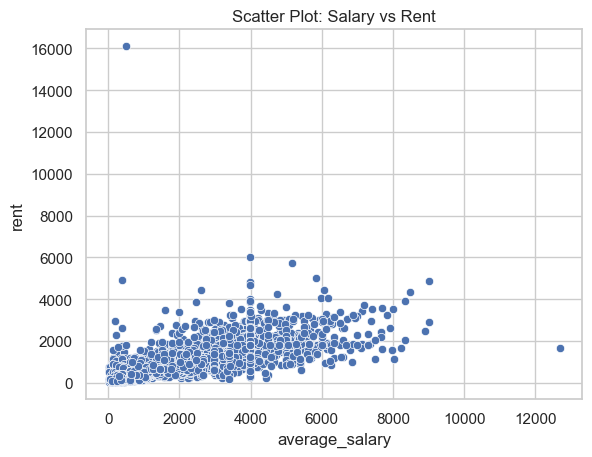

In [16]:
# Scatter plot: visualize relationships between two specific cost factors

sns.scatterplot(x='average_salary', y='rent', data=cost)
plt.title('Scatter Plot: Salary vs Rent')
plt.show()

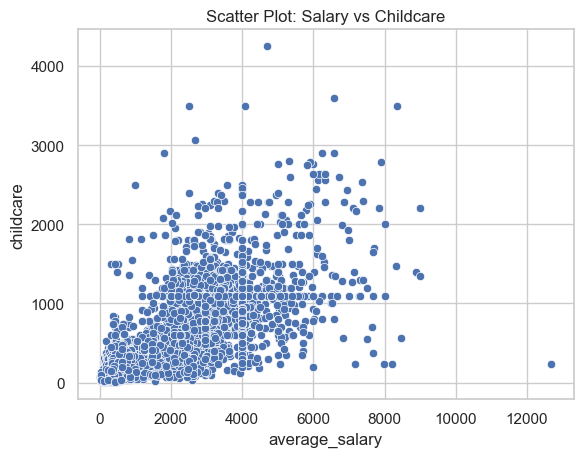

In [17]:
# Scatter plot: visualize relationships between two specific cost factors

sns.scatterplot(x='average_salary', y='childcare', data=cost)
plt.title('Scatter Plot: Salary vs Childcare')
plt.show()

In [18]:
# Family expenses vs Average Salary with 'Childcare'

cost['family_expenses'] = cost[['restaurant', 'groceries', 'transport', 'freetime', 'utilities', 'childcare', 'clothing', 'rent']].sum(axis=1)
cost[['family_expenses']]

family_expenses
0              562.79
1             3196.18
2             1004.70
3             1350.41
4             2288.47
...               ...
4644          3163.49
4645          2635.00
4646          1735.21
4647           810.53
4648          4392.43

[4649 rows x 1 columns]

In [19]:
cost['family_difference'] = cost['average_salary'] - cost['family_expenses']
result = cost[['city', 'continent', 'average_salary', 'family_expenses', 'family_difference']]
result

city continent  average_salary  family_expenses  \
0                  Delhi      Asia          586.35           562.79   
1               Shanghai      Asia         1382.83          3196.18   
2                Jakarta      Asia          483.19          1004.70   
3                 Manila      Asia          419.02          1350.41   
4                  Seoul      Asia         2672.23          2288.47   
...                  ...       ...             ...              ...   
4644        Port Douglas   Oceania         5867.96          3163.49   
4645         Rockhampton   Oceania         3435.18          2635.00   
4646        Egilsstadhir    Europe         2471.40          1735.21   
4647  Ixtapa Zihuatanejo   America          635.37           810.53   
4648             Iqaluit   America         2970.08          4392.43   

      family_difference  
0                 23.56  
1              -1813.35  
2               -521.51  
3               -931.39  
4                383.76  
...                 ...  
4644            2704.47  
4645             800.18  
4646             736.19  
4647            -175.16  
4648           -1422.35  

[4649 rows x 5 columns]

In [20]:
# Interactive Scatterplot: Family expenses vs Average Salary with 'Childcare'

fig = px.scatter(cost, x='average_salary', y='family_difference', color='continent', size='family_expenses',
                 hover_name='city', title='Interactive Scatter Plot: Family expenses vs Average Salary', color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(
    xaxis_title='Average Salary',
    yaxis_title='Difference: Average Salary minus Family Expenses',
    showlegend=True,
    autosize=False,
    width=980,
    height=600,
    template="plotly_white")

fig.show()

In [21]:
# Sinlge expenses vs Average Salary without 'Childcare'

cost['single_expenses'] = cost[['restaurant', 'groceries', 'transport', 'freetime', 'utilities', 'clothing', 'rent']].sum(axis=1)
cost[['single_expenses']]

single_expenses
0              489.03
1             1839.55
2              871.96
3             1095.52
4             1904.46
...               ...
4644          1822.24
4645          1213.37
4646          1558.68
4647           618.66
4648          3613.68

[4649 rows x 1 columns]

In [22]:
cost['single_difference'] = cost['average_salary'] - cost['single_expenses']
result = cost[['city', 'continent', 'average_salary', 'single_expenses', 'single_difference']]
result

city continent  average_salary  single_expenses  \
0                  Delhi      Asia          586.35           489.03   
1               Shanghai      Asia         1382.83          1839.55   
2                Jakarta      Asia          483.19           871.96   
3                 Manila      Asia          419.02          1095.52   
4                  Seoul      Asia         2672.23          1904.46   
...                  ...       ...             ...              ...   
4644        Port Douglas   Oceania         5867.96          1822.24   
4645         Rockhampton   Oceania         3435.18          1213.37   
4646        Egilsstadhir    Europe         2471.40          1558.68   
4647  Ixtapa Zihuatanejo   America          635.37           618.66   
4648             Iqaluit   America         2970.08          3613.68   

      single_difference  
0                 97.32  
1               -456.72  
2               -388.77  
3               -676.50  
4                767.77  
...                 ...  
4644            4045.72  
4645            2221.81  
4646             912.72  
4647              16.71  
4648            -643.60  

[4649 rows x 5 columns]

In [23]:
# Interactive Scatterplot: Single expenses vs Average Salary without 'Childcare'

fig = px.scatter(cost, x='average_salary', y='single_difference', color='continent', size='single_expenses',
                 hover_name='city', title='Interactive Scatter Plot: Single expenses vs Average Salary', color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(
    xaxis_title='Average Salary',
    yaxis_title='Difference: Average Salary minus Single Expenses',
    showlegend=True,
    autosize=False,
    width=980,
    height=600,
    template="plotly_white")

fig.show()

In [24]:
# Interactive Scatterplot: Single expenses vs Family expenses

fig = px.scatter(cost, x='family_expenses', y='single_expenses', color='continent', size='average_salary',
                 hover_name='city', title='Interactive Scatter Plot: Single expenses vs Family expenses', color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(
    xaxis_title='Family Expenses',
    yaxis_title='Single Expenses',
    showlegend=True,
    autosize=False,
    width=980,
    height=600,
    template="plotly_white")

fig.show()

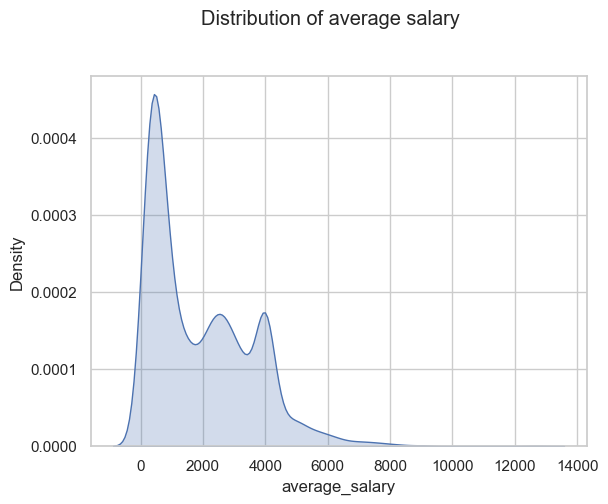

In [25]:
# KDE (Kernel Density Estimate) distribution of average salary

sns.kdeplot(cost['average_salary'], fill=True)
plt.suptitle('Distribution of average salary', y=1.02)
plt.show()

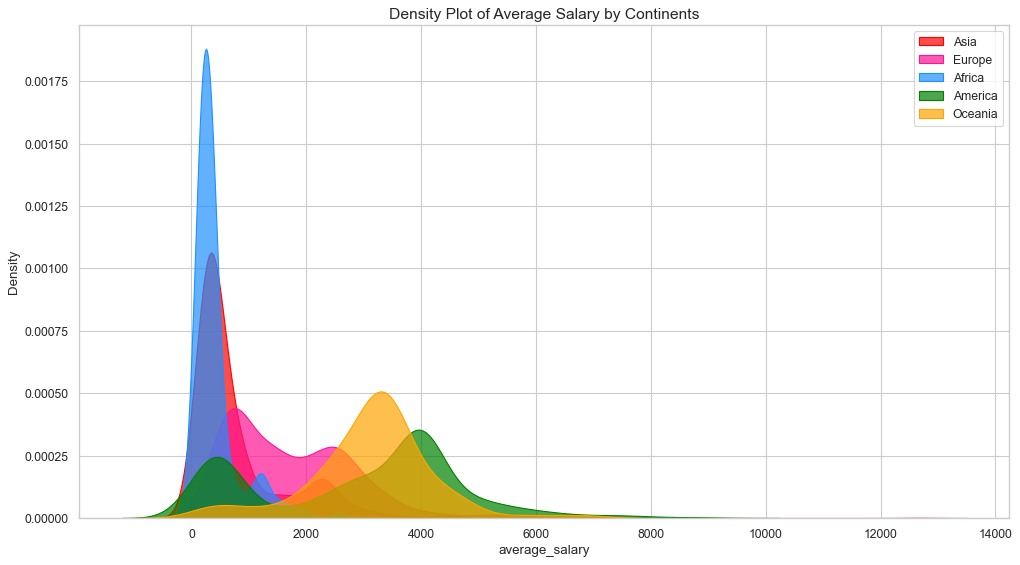

In [26]:
# KDE (Kernel Density Estimate) distribution of average salary by Continents

plt.figure(figsize=(15, 8), dpi=80)
sns.kdeplot(cost.loc[cost['continent'] == 'Asia', 'average_salary'], fill=True, color='red', label='Asia', alpha=.7)
sns.kdeplot(cost.loc[cost['continent'] == 'Europe', 'average_salary'], fill=True, color='deeppink', label='Europe', alpha=.7)
sns.kdeplot(cost.loc[cost['continent'] == 'Africa', 'average_salary'], fill=True, color='dodgerblue', label='Africa', alpha=.7)
sns.kdeplot(cost.loc[cost['continent'] == 'America', 'average_salary'], fill=True, color='green', label='America', alpha=.7)
sns.kdeplot(cost.loc[cost['continent'] == 'Oceania', 'average_salary'], fill=True, color='orange', label='Oceania', alpha=.7)


plt.title('Density Plot of Average Salary by Continents', fontsize=14)
plt.legend()
plt.show()

In [27]:
# Interactive KDE Distribution of Average Salary by Continents 

fig = px.histogram(cost, 
                   x='average_salary', 
                   color='continent', 
                   barmode='overlay',
                   nbins=100,  
                   opacity=0.8,  
                   color_discrete_sequence=['red', 'deeppink', 'dodgerblue', 'green', 'orange']
                   )

fig.update_layout(
    title='Interactive KDE Distribution of Average Salary by Continents',
    xaxis_title='Average Salary',
    yaxis_title='Density',
    showlegend=True,
    autosize=False,
    width=980,
    height=600,
    template="plotly_white",
)

fig.show()

In [28]:
###### TEST

import plotly.figure_factory as ff


x1 = cost.loc[cost['continent'] == 'Asia', 'average_salary']
x2 = cost.loc[cost['continent'] == 'America', 'average_salary']
x3 = cost.loc[cost['continent'] == 'Africa', 'average_salary']
x4 = cost.loc[cost['continent'] == 'Europe', 'average_salary']
x5 = cost.loc[cost['continent'] == 'Oceania', 'average_salary']

x1 = np.random.randn(200)-2
x2 = np.random.randn(200)
x3 = np.random.randn(200)+2
x4 = np.random.randn(200)+4
x5 = np.random.randn(200)+6

hist_data = [x1, x2, x3, x4, x5]
group_labels = ['Asia', 'America', 'Africa', 'Europe', 'Oceania']
fig = ff.create_distplot(hist_data, group_labels, bin_size=[.1, .25, .5, 1, 1.25])
fig.show()

In [29]:
# Create an interactive scatter plot using Plotly Express

fig = px.scatter(cost, x='average_salary', y='rent', color='continent', size='housing_price',
                 hover_name='city', title='Interactive Scatter Plot', color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(
    xaxis_title='Average Salary',
    yaxis_title='Rent',
    showlegend=True,
    autosize=False,
    width=980,
    height=600,
    template="plotly_white")

fig.show()

In [30]:
# Interactive Bar Chart - Average Salary by Continent

cost = cost.sort_values(by='average_salary', ascending=True)

fig = px.bar(cost, x='continent', y='average_salary', color='continent',
             hover_name='city', 
             hover_data={'average_salary': ':,.2f'}, 
             title='Interactive Bar Chart - Average Salary by Continent',
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(
    xaxis_title='Continent',
    yaxis_title='Average Salary',
    showlegend=True,
    autosize=False,
    width=800,
    height=600,
    template="plotly_white",
    yaxis=dict(tickformat=","))
fig.show()

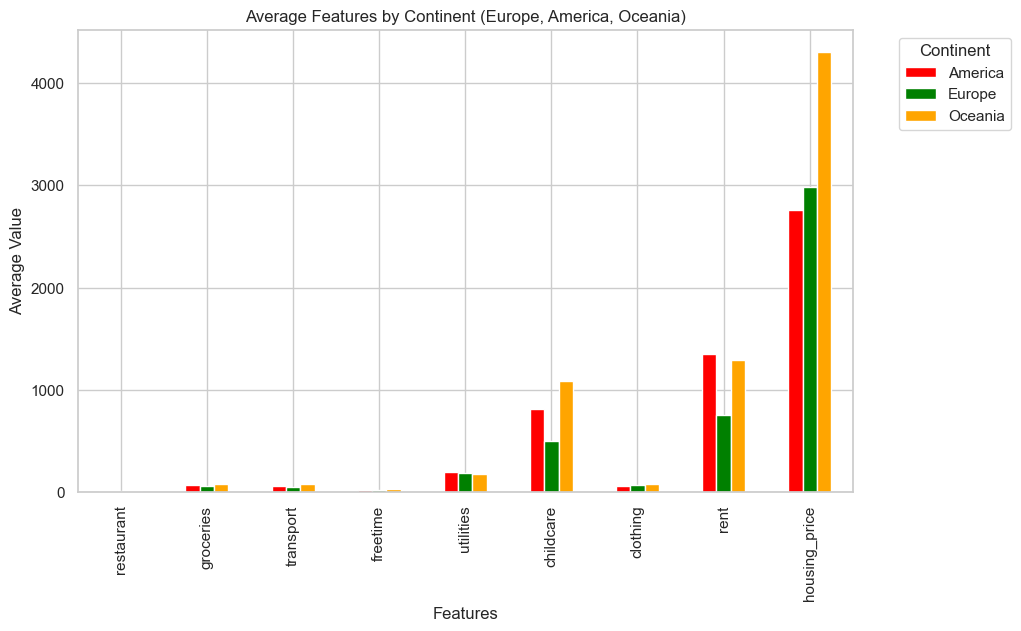

In [31]:
# The average features in each continent (Europe, America, Oceania)

selected_continents = ['Europe', 'America', 'Oceania']
average_features_by_continent = cost[cost['continent'].isin(selected_continents)].groupby('continent')[['restaurant', 'groceries', 'transport', 'freetime', 'utilities', 'childcare', 'clothing', 'rent', 'housing_price']].mean()

# Set color palette within Seaborn context
with sns.color_palette(['red', 'green', 'orange']):
    average_features_by_continent.T.plot(kind='bar', figsize=(10, 6)) 

plt.title('Average Features by Continent (Europe, America, Oceania)')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [32]:
# Calculate mean values for each feature individually in America

america = cost[cost['continent'] == 'America']
avg_features_america = america[['restaurant', 'groceries', 'transport', 'freetime', 'utilities', 'childcare', 'clothing', 'rent', 'housing_price']].mean()
top_5_america = avg_features_america.sort_values(ascending=False).head(5)
top_5_america

housing_price    2763.632282
rent             1346.659903
childcare         812.509586
utilities         197.312167
groceries          69.614620
dtype: float64

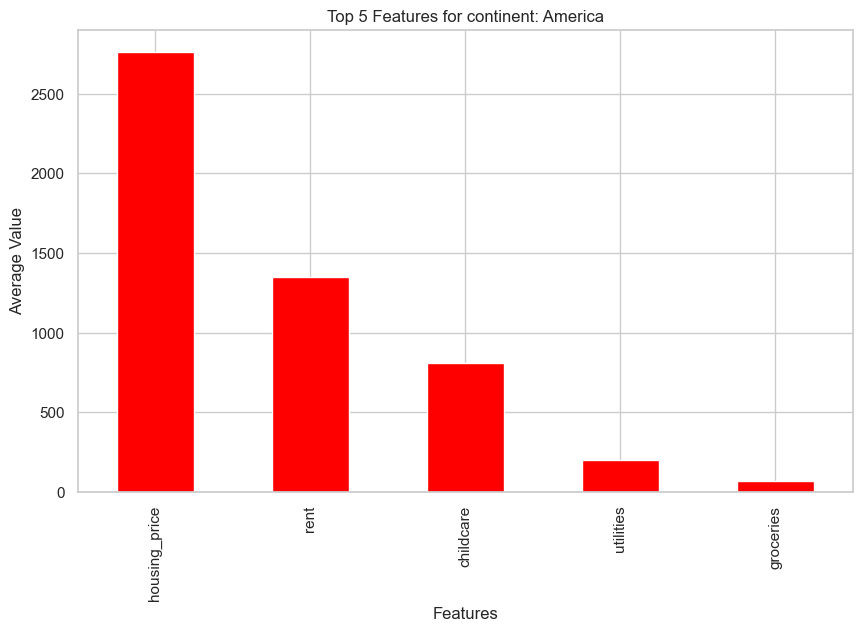

In [33]:
# Top 5 features in America

sns.set(style="whitegrid")

top_5_america.plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Top 5 Features for continent: America')
plt.xlabel('Features')
plt.ylabel('Average Value')

plt.show()

In [34]:
# Calculate mean values for each feature individually in Europe

europe = cost[cost['continent'] == 'Europe']
avg_features_europe = europe[['restaurant', 'groceries', 'transport', 'freetime', 'utilities', 'childcare', 'clothing', 'rent', 'housing_price']].mean()
top_5_europe = avg_features_europe.sort_values(ascending=False).head(5)
top_5_europe

housing_price    2987.831002
rent              754.622627
childcare         500.990048
utilities         188.982352
clothing           71.368482
dtype: float64

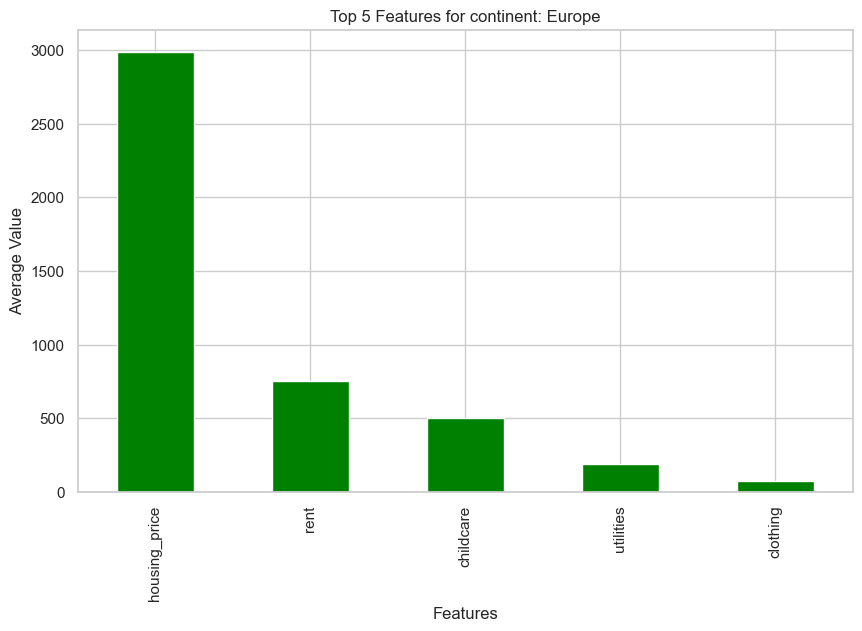

In [35]:
# Top 5 features in Europe

sns.set(style="whitegrid")

top_5_europe.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Top 5 Features for continent: Europe')
plt.xlabel('Features')
plt.ylabel('Average Value')

plt.show()

In [36]:
# Calculate mean values for each feature individually in Oceania

oceania = cost[cost['continent'] == 'Oceania']
avg_features_oceania = oceania[['restaurant', 'groceries', 'transport', 'freetime', 'utilities', 
                                'childcare', 'clothing', 'rent', 'housing_price']].mean()
top_5_oceania = avg_features_oceania.sort_values(ascending=False).head(5)
top_5_oceania

housing_price    4307.469659
rent             1293.015568
childcare        1084.976818
utilities         173.198750
clothing           73.180000
dtype: float64

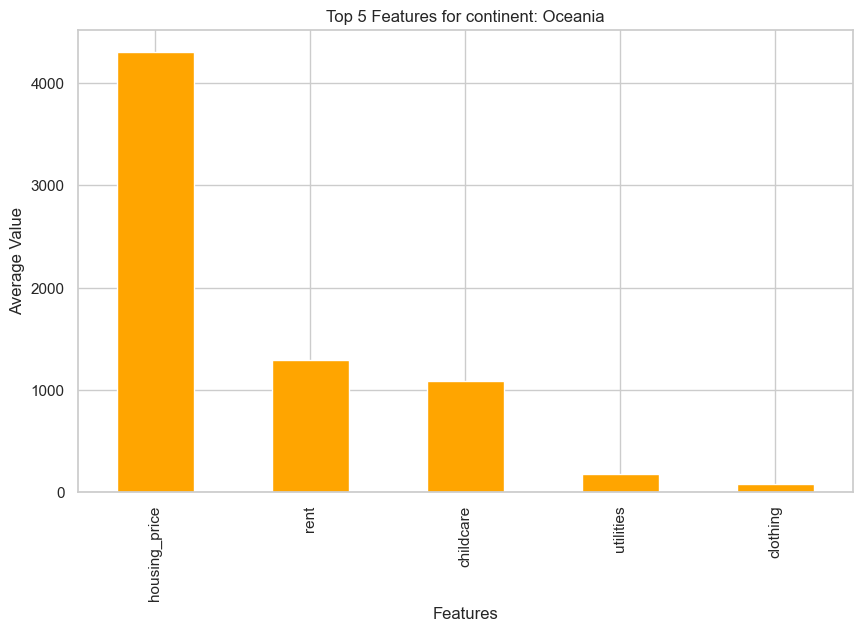

In [37]:
# Top 5 features in Ocenia

sns.set(style="whitegrid")

top_5_oceania.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Top 5 Features for continent: Oceania')
plt.xlabel('Features')
plt.ylabel('Average Value')

plt.show()